In [3]:
%load_ext autoreload
%autoreload 2

import pandas as pd
pd.set_option('display.max_rows', 500)

from cataclop.ml.pipeline.balphagore import Balphagore

2021-11-01 02:32:47.392351: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-01 02:32:47.392629: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [259]:
def reco_mysql():
    from django.db import connections, connection
    for conn in connections.all():
        conn.close_if_unusable_or_obsolete()

In [518]:
balphagore = Balphagore()
balphagore.load_dataset(filters={'start_at__date__gte':'2019-01-01', 'start_at__date__lte':'2019-12-31', 'category': ['HANDICAP']})

1345 races


In [520]:
balphagore.df['target'] = ((balphagore.df['position'] >= 1) & (balphagore.df['position'] <= balphagore.df['declared_player_count'] / 3)).astype('float')
balphagore.TARGET = 'target'
balphagore.FEATURES = balphagore.FEATURES + ['final_odds_ref', 'final_odds']

In [521]:
balphagore.train()

12283 train samples, 3122 validation samples


Epoch 1/10
162/162 [==============================] - 1s 3ms/step - loss: 1.9274
Epoch 2/10
162/162 [==============================] - 0s 3ms/step - loss: 0.8107
Epoch 3/10
162/162 [==============================] - 0s 3ms/step - loss: 0.6705
Epoch 4/10
162/162 [==============================] - 0s 3ms/step - loss: 0.6197
Epoch 5/10
162/162 [==============================] - 0s 3ms/step - loss: 0.5981
Epoch 6/10
162/162 [==============================] - 0s 3ms/step - loss: 0.5704
Epoch 7/10
162/162 [==============================] - 0s 3ms/step - loss: 0.5742
Epoch 8/10
162/162 [==============================] - 0s 3ms/step - loss: 0.5548
Epoch 9/10
162/162 [==============================] - 1s 3ms/step - loss: 0.5582
Epoch 10/10
192/192 [==============================] - 1s 3ms/step
Epoch 1/10
161/161 [==============================] - 1s 3ms/step - loss: 2.7512
Epoch 2/10
161/161 [==============================] - 1s 3ms/step - loss: 1.0430
Epoch 3/10
161/161 [======================

In [522]:
balphagore.debug_race(balphagore.df_train)

position sub_category  num               music  final_odds  \
race_id                                                                    
76885   812        8.0     HANDICAP    5        2p2p8p(18)3p        4.20   
        810        1.0     HANDICAP    3        8p(18)8p9p7p       24.00   
        811        7.0     HANDICAP    4        2p1p2p(18)5p        5.90   
        813       12.0     HANDICAP    6        0p7p8p(18)7p       41.20   
        814        5.0     HANDICAP    7        1p4p(18)9p9p        8.30   
        815        6.0     HANDICAP    8        5p(18)0p0p9p       35.30   
        816       11.0     HANDICAP    9        9p(18)0p0p6p       39.80   
        817        9.0     HANDICAP   10          8p0p1p2p2p       18.10   
        818        3.0     HANDICAP   11        4p6p4p(18)6p        7.10   
        809        4.0     HANDICAP    2        0p4p5p(18)5p        5.00   
        819        2.0     HANDICAP   12            5p6p7p4p       24.90   
        808       10.0     HANDICAP    1        0p0p0p(18)0p       11.30   
76889   861        6.0     HANDICAP   10        0p9p7p(18)0p       44.40   
        860        1.0     HANDICAP    9        2p1p(18)5p3p        6.70   
        859       10.0     HANDICAP    8                5p0p       39.50   
        858        5.0     HANDICAP    7                0p0p       35.00   
        857        7.0     HANDICAP    6              Inédit        5.40   
        856        9.0     HANDICAP    5        7p(18)9p1p2p        6.00   
        863       12.0     HANDICAP   12        9p7p(18)7p0p       27.30   
        855        3.0     HANDICAP    4              Inédit       17.90   
        854        8.0     HANDICAP    3        3p0p(18)0p5p        6.90   
        862        2.0     HANDICAP   11        3p0p(18)9p1p       12.00   
        852       11.0     HANDICAP    1        6p5p(18)1p4p       23.40   
        853        4.0     HANDICAP    2        1p1p8p(18)6p        4.40   
77522   1674       1.0     HANDICAP    1              4p0p2p        4.10   
        1675       8.0     HANDICAP    2              5p0p5p       29.40   
        1676       NaN     HANDICAP    3              6p9p8p        3.40   
        1677       6.0     HANDICAP    4              1p6p8p        9.40   
        1678      10.0     HANDICAP    5              8p4p1p        9.80   
        1679       5.0     HANDICAP    6              4p4p2p        9.40   
        1680       4.0     HANDICAP    7              1p5p1p        3.60   
        1681       2.0     HANDICAP    8              9p3p4p       11.30   
        1682       3.0     HANDICAP    9              0p8p4p       13.50   
        1683       9.0     HANDICAP   10              7p0p6p        8.60   
        1684       7.0     HANDICAP   11              0p0p9p       43.50   
78878   3146       4.0     HANDICAP    1            0p1p1p5p        1.80   
        3147       6.0     HANDICAP    2        5p4p0p(18)6p        8.40   
        3148       2.0     HANDICAP    3        3p2p1p(18)4p        6.50   
        3149       3.0     HANDICAP    4        6p0p(18)7p1p       10.00   
        3150       1.0     HANDICAP    5          (18)5p1p2p        4.70   
        3151       5.0     HANDICAP    6            4pRp4p4p       19.00   
80703   4757       7.0     HANDICAP    8        2h4h(18)4h3h       15.00   
        4752       5.0     HANDICAP    3          4h6h2h1h1h       12.00   
        4753       NaN     HANDICAP    4          2h1hAh1h4h        9.10   
        4754      10.0     HANDICAP    5        1s5s2s(18)3h        4.50   
        4755       1.0     HANDICAP    6            4s0h2h9h       26.00   
        4756       4.0     HANDICAP    7        1h7h(18)7h2h       15.00   
        4750       2.0     HANDICAP    1        2h0h(18)9p4p        5.60   
        4758       8.0     HANDICAP    9          1h0p2h3h0h       12.00   
        4759      11.0     HANDICAP   10        4h2h7h(17)1h       33.00   
        4760      13.0     HANDICAP   11          7h1h6h0p5h  

In [523]:
balphagore.bet(balphagore.df_train)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1076/1076 [03:07<00:00,  5.73it/s]


In [524]:
for strat in balphagore.strategies:
    print(strat["name"])
    print(balphagore.bets[balphagore.bets['strategy']==strat["name"]].filter(regex='^top', axis=1).mean())

three_favs
top1_correct             0.172676
top1_in_3_correct        0.444972
top2_correct             0.032258
top2_correct_disorder    0.056926
top3_correct             0.010436
top3_correct_disorder    0.042694
top4_correct             0.003795
top4_correct_disorder    0.033207
top2_in_4_correct        0.299810
dtype: float64
three_underdogs
top1_correct             0.096774
top1_in_3_correct        0.314991
top2_correct             0.010436
top2_correct_disorder    0.018975
top3_correct             0.000000
top3_correct_disorder    0.009488
top4_correct             0.000000
top4_correct_disorder    0.014231
top2_in_4_correct        0.162239
dtype: float64
one_underdog_two_favs
top1_correct             0.072106
top1_in_3_correct        0.248577
top2_correct             0.018975
top2_correct_disorder    0.034156
top3_correct             0.004744
top3_correct_disorder    0.017078
top4_correct             0.000949
top4_correct_disorder    0.015180
top2_in_4_correct        0.191651
dty

In [526]:
reco_mysql()
balphagore.compute_profit()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7378/7378 [01:21<00:00, 90.80it/s]


In [527]:
print(balphagore.bets['race_id'].nunique())
b = balphagore.bets
b = b[b['pred']>0]
for strat in balphagore.strategies:
    print(strat["name"])
    print(b[b['strategy']==strat["name"]].filter(regex='^profit_', axis=1).mean())

1054
three_favs
profit_win                     -0.266701
profit_placed                  -0.194693
profit_top2_correct             0.000000
profit_top2_correct_disorder   -0.204787
profit_top3_correct             0.058689
profit_top3_correct_disorder    0.010198
profit_top4_correct            -0.018730
profit_top4_correct_disorder   -0.108741
profit_top2_in_4_correct       -0.081790
dtype: float64
three_underdogs
profit_win                     -0.277059
profit_placed                  -0.143274
profit_top2_correct             0.000000
profit_top2_correct_disorder   -0.217414
profit_top3_correct            -0.077164
profit_top3_correct_disorder   -0.030761
profit_top4_correct            -0.018770
profit_top4_correct_disorder   -0.163712
profit_top2_in_4_correct       -0.145047
dtype: float64
one_underdog_two_favs
profit_win                     -0.313480
profit_placed                  -0.204702
profit_top2_correct             0.000000
profit_top2_correct_disorder   -0.132915
profit_top3_co

In [499]:
profit_cols = [col for col in balphagore.bets.columns if col.startswith('profit_')]

HANDICAP
three_favs


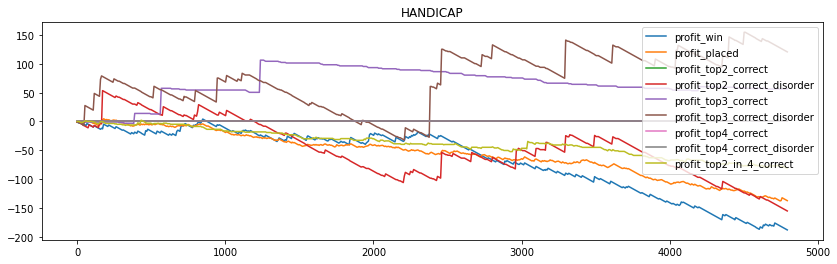

three_underdogs


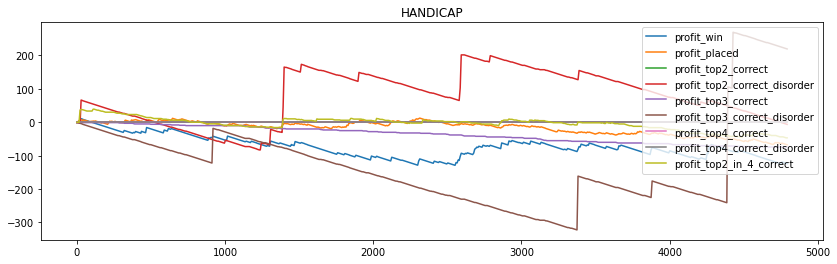

one_underdog_two_favs


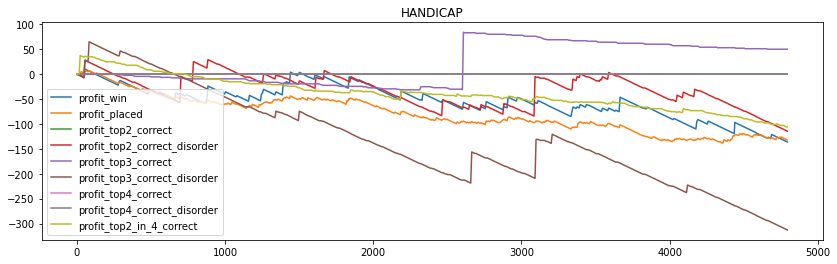

one_fav_two_underdogs


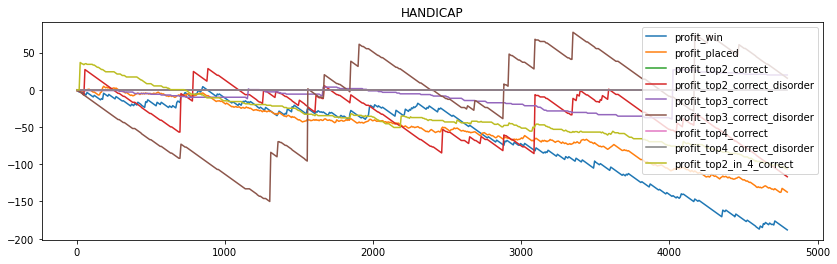

three_odds_favs


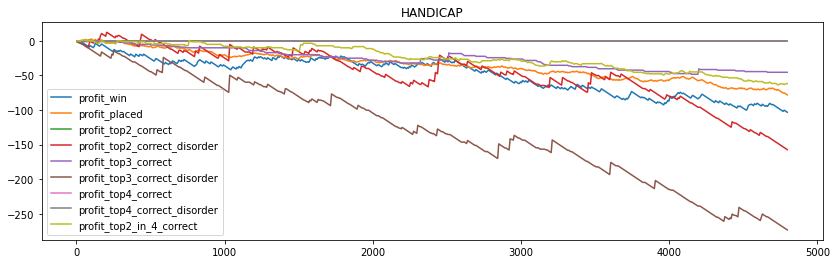

two_odds_fav_one_fav


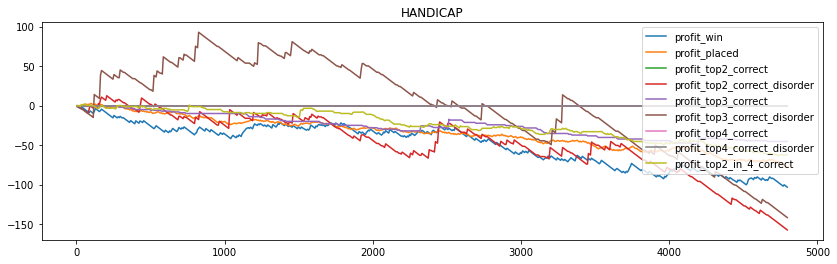

one_odds_fav_two_favs


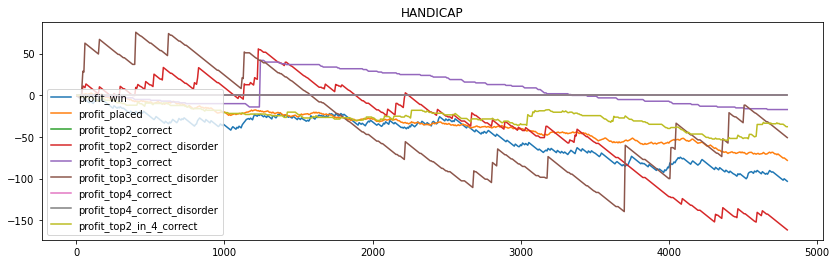

In [537]:
from matplotlib import pyplot as plt
for subcat in balphagore.bets.sub_category.value_counts().index[:5]:
    print(subcat)
    b = balphagore.bets
    b = b[(b['sub_category']==subcat) & (b['pred'] > 0.) & (b['declared_player_count']<13)].copy()
    b.reset_index(inplace=True, drop=True)
    for strat in balphagore.strategies:
        print(strat["name"])
        for col in profit_cols:
            b[b['strategy']==strat["name"]][col].cumsum().plot(title=subcat, legend=True, figsize=(14,4))
        plt.show()

,profit_win,profit_placed,profit_top2_correct,profit_top2_correct_disorder,profit_top3_correct,profit_top3_correct_disorder,profit_top4_correct,profit_top4_correct_disorder,profit_top2_in_4_correct
count,1190.000000,1190.000000,1190.0,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,-0.168403,-0.135042,0.0,-0.190840,-0.030168,-0.292605,-0.002521,1.099916,-0.198319
std,1.194567,0.729568,0.0,2.521636,0.351528,3.091854,0.050167,12.816264,1.323272
min,-1.000000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,0.0,-1.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000
50%,-1.000000,0.100000,0.0,-1.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000
75%,0.700000,0.400000,0.0,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
max,4.300000,1.600000,0.0,28.600000,10.100000,38.200000,0.000000,230.000000,22.800000


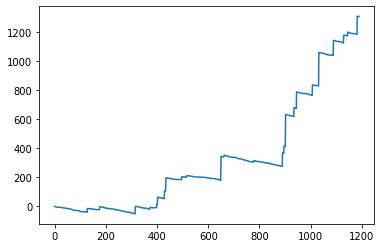

In [508]:
subcat = 'AUTOSTART'
col = 'profit_top4_correct_disorder'
strat = 0

b = balphagore.bets
b = b[(b['sub_category']==subcat) & (b['strategy']=='one_odds_fav_two_favs') ].copy()
b.reset_index(inplace=True, drop=True)
b[col].cumsum().plot()
b[profit_cols].describe()

profit_win                     -0.020000
profit_placed                  -0.030588
profit_top2_correct             0.000000
profit_top2_correct_disorder   -0.031176
profit_top3_correct             0.018235
profit_top3_correct_disorder    5.084706
profit_top4_correct            -0.005882
profit_top4_correct_disorder   -0.182353
profit_top2_in_4_correct        0.022353
dtype: float64

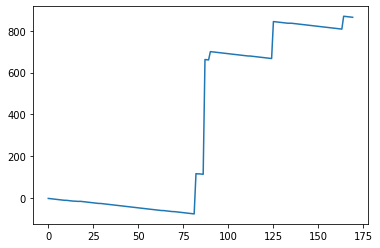

In [256]:
subcat = 'AUTOSTART'
col = 'profit_top3_correct_disorder'
strat = 7

b = balphagore.bets
b = b[(b['sub_category']==subcat) & (b['b_odds_mean3'] < 20) & (b['b_odds_mean3'] > b['b_odds_mean2']) & ((b['strategy']==strat+1)) & (b['declared_player_count']<20)].copy()
b.reset_index(inplace=True, drop=True)
b[col].cumsum().plot()
b[profit_cols].mean()

profit_win                      0.221811
profit_placed                   0.233333
profit_top2_correct             0.000000
profit_top2_correct_disorder   -1.000000
profit_top3_correct             0.000000
profit_top3_correct_disorder   -0.954733
profit_top4_correct            -0.045267
profit_top4_correct_disorder   -0.337449
profit_top2_in_4_correct       -0.399177
dtype: float64

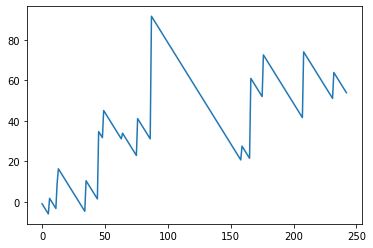

In [291]:
subcat = 'HANDICAP'
col = 'profit_win'
strat = 7

b = balphagore.bets
b = b[(b['sub_category']==subcat) & (b['b_odds_mean3'] > 20) & ((b['strategy']==strat+1))].copy()
b.reset_index(inplace=True, drop=True)
b[col].cumsum().plot()
b[profit_cols].mean()

In [509]:
cols = ['profit_top4_correct_disorder']
b[b['profit_top4_correct_disorder']>0][['race_id', 'start_at', 'b_odds_mean3', 'b_odds_1', 'b_odds_2', 'b_odds_3', 'odds_1', 'odds_2', 'odds_3', 'combo', 'combo_real', 'odds'] + cols]

,race_id,start_at,b_odds_mean3,b_odds_1,b_odds_2,b_odds_3,odds_1,odds_2,odds_3,combo,combo_real,odds,profit_top4_correct_disorder
128,78353,2019-04-30 17:55:00,3.933333,2.9,5.9,3.0,3.0,5.9,9.2,"[8, 1, 7, 1]","[8, 7, 1]","[2.9, 5.9, 3.0, 5.9]",26.0
176,78804,2019-05-11 21:00:00,4.700000,3.9,5.6,4.6,4.6,5.6,10.0,"[8, 6, 5, 5]","[8, 5, 2]","[3.9, 5.6, 4.6, 4.6]",19.5
315,80000,2019-06-12 20:05:00,4.766667,3.8,6.3,4.2,4.2,6.3,6.8,"[2, 6, 1, 1]","[2, 6, 1]","[3.8, 6.3, 4.2, 4.2]",51.5
372,80556,2019-06-27 14:02:00,5.500000,2.8,5.9,7.8,5.9,7.3,7.6,"[4, 3, 1, 3]","[1, 4, 3]","[2.8, 5.9, 7.8, 5.9]",11.4
399,80848,2019-07-04 15:30:00,5.533333,5.0,4.1,7.5,5.0,7.5,8.8,"[2, 5, 6, 5]","[6, 2, 5]","[5.0, 4.1, 7.5, 4.1]",22.6
402,80851,2019-07-04 16:24:00,5.166667,4.8,5.3,5.4,5.3,5.4,6.8,"[1, 6, 5, 5]","[12, 5, 1]","[4.8, 5.3, 5.4, 5.4]",51.5
429,81066,2019-07-10 18:30:00,8.033333,2.2,9.9,12.0,5.5,9.9,12.0,"[12, 1, 2, 1]","[12, 2, 1]","[2.2, 9.9, 12.0, 9.9]",51.5
434,81099,2019-07-11 12:52:00,8.866667,3.8,14.0,8.8,3.8,5.7,8.8,"[2, 4, 5, 5]","[5, 4, 2]","[3.8, 14.0, 8.8, 8.8]",41.0
435,81100,2019-07-11 13:27:00,7.366667,3.1,9.1,9.9,7.5,8.8,9.1,"[7, 6, 4, 6]","[6, 11, 4]","[3.1, 9.1, 9.9, 9.1]",51.5
496,81623,2019-07-24 17:02:00,5.866667,3.4,6.0,8.2,6.0,7.1,8.2,"[1, 2, 13, 13]","[2, 1, 13]","[3.4, 6.0, 8.2, 8.2]",6.8


In [237]:
np.std([5.5,19.0,5.7])


6.317348248188387

In [234]:
b[profit_cols].mean()

profit_win                     -0.240000
profit_placed                   0.057846
profit_top2_correct             0.000000
profit_top2_correct_disorder   -0.329231
profit_top3_correct            -0.085846
profit_top3_correct_disorder    3.377846
profit_top4_correct             0.000000
profit_top4_correct_disorder    0.000000
profit_top2_in_4_correct       -0.065846
dtype: float64

In [199]:
b['b_odds_1']

0      15.0
1      17.5
2      12.2
3      14.8
4      23.8
       ... 
645    23.0
646    22.0
647    17.0
648    42.0
649     9.4
Name: b_odds_1, Length: 650, dtype: float64

In [195]:
b['odds_1']

0      5.8
1      5.8
2      5.9
3      6.8
4      4.4
      ... 
645    3.6
646    8.3
647    3.6
648    4.2
649    5.8
Name: odds_1, Length: 650, dtype: float64

In [ ]:
balphagore.save_model()

In [260]:
reco_mysql()
balphagore2 = Balphagore()
balphagore2.load_dataset(filters={'start_at__date__gte':'2021-09-01', 'start_at__date__lte':'2021-10-01'})

1281 races


In [ ]:
balphagore2.load_model()


In [261]:
balphagore2.models = balphagore.models

In [262]:
balphagore2.predict(balphagore2.df)

454/454 [==============================] - 2s 4ms/step


In [263]:
balphagore2.debug_race()

position         sub_category  num                   music  \
race_id id                                                                    
111020  1348111       2.0            NATIONALE    8  0a0aDaDa(20)3a4aDa0a2a   
        1348107       NaN            NATIONALE    4    Da2aDa2a2a6a5aDa5a9a   
        1348106      10.0            NATIONALE    3      9a7a1a1a2a8aRa7aDa   
        1348105       6.0            NATIONALE    2    6a6a0aDaDa2a1a2aDa4a   
        1348104      12.0            NATIONALE    1    DaDa0a1a3aDa5a4a2aDa   
        1348110       8.0            NATIONALE    7          Da4a2a3a2a2a1a   
        1348112      11.0            NATIONALE    9            3a1aDa1a2a2a   
        1348113       9.0            NATIONALE   10        6a2aDa7a1a2a4a1a   
        1348114       5.0            NATIONALE   11    1a4a7a3a7a0a4a8a5a4a   
        1348115       NaN            NATIONALE   12  3a3a1a1a2a3a3a(20)3a9a   
        1348116       NaN            NATIONALE   13    Da4a1a6aDa3aDa7a2a7a   
        1348117       NaN            NATIONALE   14  6m6m2m(20)1mDm4m3m5m6a   
        1348118       4.0            NATIONALE   15    DaDaDa3a6a4a5aDa2a6a   
        1348119       1.0            NATIONALE   16    0a2a2a1a4a4a4a3a4a8a   
        1348108       7.0            NATIONALE    5  5a1aDaDa9a2a8a5a(20)9a   
        1348109       3.0            NATIONALE    6    3a0a5aDa0a3aDa3a4a3a   
111504  1353521      14.0              INCONNU    3  0aDa6a0a(20)5a5a7a3a8a   
        1353520       1.0              INCONNU    2  5a7a0a3a2a1a5a2a(20)9a   
        1353519       NaN              INCONNU    1    1a1a1a9a9aDaDaDaDa6a   
        1353535       2.0              INCONNU   17  6a1a2a1aDa2a1a2a(20)Da   
        1353536      10.0              INCONNU   18  2a9a0a5a3a6a0a8a(20)6a   
        1353533       4.0              INCONNU   15    4a2a4mDa1a5a2a5a3a4a   
        1353522      12.0              INCONNU    4    8a4a7a3a3a8a4aDa5a5a   
        1353532      13.0              INCONNU   14  9a9a3a2a1a7a(20)9a2a6a   
        1353531       6.0              INCONNU   13  7a3a2a2a2a0a1a(20)5a3a   
        1353529       7.0              INCONNU   11  1a3a8a4a1a3a4a4a(20)8a   
        1353528       9.0              INCONNU   10              1a2a1aDa1a   
        1353530       8.0              INCONNU   12    5a3a5a4a1a6a5a5a1a5a   
        1353526      16.0              INCONNU    8    0aDa7a7aDaDa3a0aDaDa   
        1353525       5.0              INCONNU    7  4a2a5a5a2a7a5a0a(20)5a   
        1353524      15.0              INCONNU    6    1a7m5aDa8a5aDaDa1aDm   
        1353523       3.0              INCONNU    5    6a8a7a6m2mDa5a5a3aDa   
        1353527      11.0              INCONNU    9    4aDa4aDaDaDa0a9a1a2a   
        1353534       NaN              INCONNU   16    9a2a2a3aDa1a3a2a7a7a   
111505  1353543       5.0            NATIONALE    7    DaDa3a3a3aDa4a6a6a3a   
        1353546      12.0            NATIONALE   10    5a7a5a0a0a7a3a5aDa1a   
        1353545      11.0            NATIONALE    9    2a2a8aRa(19)0a8a2a1a   
        1353544       8.0            NATIONALE    8    0a5a9aDa7a7a2aDa0a9a   
        1353547       NaN            NATIONALE   11    4a4a5a3a9a2a0a0a2a3a   
        1353541       NaN            NATIONALE    5    0aTaDm2a3a9a1aDa0a3a   
        1353540       6.0            NATIONALE    4  Aa2a2a3a7a8a4a(20)0a4a   
        1353539       7.0            NATIONALE    3    4aDa7a6aDa4a0a5a6a0a   
        1353542       4.0            NATIONALE    6    DaDa4aDa8a2aDaDa6a1a   
        1353548       3.0            NATIONALE   12  Da3a5a0a(20)5a9aDa0a4a   
        1353554       NaN            NATIONALE   18    Da4aDa7aDa1a1a0a8a7a   
        1353550       1.0            NATIONALE   14    1a1a3aDa1a2a3a3a4a4a   
        1353538       NaN            NATIONALE    2  Da7aDaDaDa(20)Da1a2a5a   
        1353549      10.0            NATIONALE   13    1a3a7a8a7a5a9a1aDa1a   
        1353552       9.0            NATIONALE   16    Da6aDaDa7a6a

In [264]:
balphagore2.bet(balphagore2.df)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1281/1281 [01:59<00:00, 10.76it/s]


In [265]:
balphagore2.compute_profit()

  0%|                                                                                                                                                         | 7/9880 [00:00<10:19, 15.93it/s]/opt/pysetup/.venv/lib/python3.7/site-packages/numpy/core/numeric.py:2378: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())
 11%|█████████████████                                                                                                                                     | 1120/9880 [00:14<01:43, 84.81it/s]

4 [5]
5 [5]
2 [5]
4 [4]
5 [4]
2 [4]
4 [1]
5 [1]
2 [1]
4 [3]
5 [3]
2 [3]
4 [7]
5 [7]
2 [7]
4 [8]
5 [8]
2 [8]
4 [6]
5 [6]
2 [6]
4 [2]
5 [2]
2 [2]


 33%|██████████████████████████████████████████████████                                                                                                    | 3301/9880 [00:41<01:20, 81.97it/s]

6-4 [6, 3, 8]
6-3 [6, 3, 8]
6-1 [6, 3, 8]
4-3 [6, 3, 8]
4-1 [6, 3, 8]
3-1 [6, 3, 8]
4 [6]
6 [6]
3 [6]
6-4 [3, 8, 5]
6-3 [3, 8, 5]
6-1 [3, 8, 5]
4-3 [3, 8, 5]
4-1 [3, 8, 5]
3-1 [3, 8, 5]
4 [3]
6 [3]
3 [3]
6-4 [8, 5, 4]
6-3 [8, 5, 4]
6-1 [8, 5, 4]
4-3 [8, 5, 4]
4-1 [8, 5, 4]
3-1 [8, 5, 4]
4 [8]
6 [8]
3 [8]
6-4 [5, 4, 1]
6-3 [5, 4, 1]
6-1 [5, 4, 1]
4-3 [5, 4, 1]
4-1 [5, 4, 1]
3-1 [5, 4, 1]
4 [5]
6 [5]
3 [5]
6-4 [2, 10, 9]
6-3 [2, 10, 9]
6-1 [2, 10, 9]
4-3 [2, 10, 9]
4-1 [2, 10, 9]
3-1 [2, 10, 9]
4 [2]
6 [2]
3 [2]
6-4 [10, 9, 7]
6-3 [10, 9, 7]
6-1 [10, 9, 7]
4-3 [10, 9, 7]
4-1 [10, 9, 7]
3-1 [10, 9, 7]
4 [10]
6 [10]
3 [10]
6-4 [9, 7, 1]
6-3 [9, 7, 1]
6-1 [9, 7, 1]
4-3 [9, 7, 1]
4-1 [9, 7, 1]
3-1 [9, 7, 1]
4 [9]
6 [9]
3 [9]
6-4 [7, 1, 4]
6-3 [7, 1, 4]
6-1 [7, 1, 4]
4-3 [7, 1, 4]
4-1 [7, 1, 4]
3-1 [7, 1, 4]
4 [7]
6 [7]
3 [7]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9880/9880 [02:11<00:00, 75.29it/s]


In [266]:
b = balphagore2.bets

In [267]:
b.filter(regex='^top', axis=1).describe()

,top1_correct,top1_in_3_correct,top2_correct,top2_correct_disorder,top3_correct,top3_correct_disorder,top4_correct,top4_correct_disorder,top2_in_4_correct
count,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000,9880.000000
mean,0.100810,0.294028,0.014575,0.026923,0.002632,0.014980,0.000607,0.012652,0.137854
std,0.301092,0.455628,0.119850,0.161867,0.051234,0.121478,0.024637,0.111772,0.344764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
b.filter(regex='^profit_', axis=1).describe()

profit_win                     -0.652778
profit_placed                  -0.424306
profit_top2_correct             0.000000
profit_top2_correct_disorder   -0.833333
profit_top3_correct            -0.152778
profit_top3_correct_disorder   -0.833333
profit_top4_correct             0.000000
profit_top4_correct_disorder    0.000000
profit_top2_in_4_correct        0.036111
dtype: float64

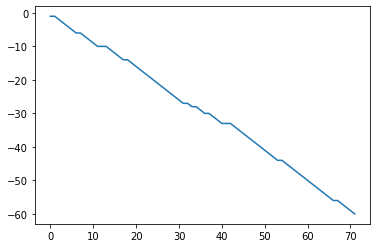

In [270]:
subcat = 'AUTOSTART'
col = 'profit_top3_correct_disorder'
strat = 7

b = balphagore2.bets
b = b[(b['sub_category']==subcat) & (b['final_odds'] < 30) & ((b['strategy']==strat+1)) & (b['declared_player_count']<14)].copy()
b.reset_index(inplace=True, drop=True)
b[col].cumsum().plot()
b[profit_cols].mean()

profit_win                      2.692308
profit_placed                   0.200000
profit_top2_correct             0.000000
profit_top2_correct_disorder   -1.000000
profit_top3_correct             0.000000
profit_top3_correct_disorder   -0.846154
profit_top4_correct            -0.153846
profit_top4_correct_disorder   -0.384615
profit_top2_in_4_correct       -0.615385
dtype: float64

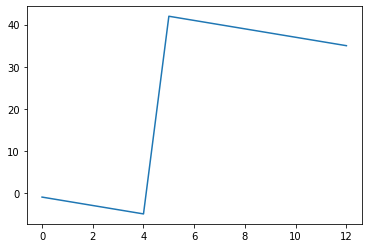

In [314]:
subcat = 'HANDICAP'
col = 'profit_win'
strat = 7

b = balphagore2.bets
b = b[(b['sub_category']==subcat) & (b['b_odds_1'] > 30) & ((b['strategy']==strat+1))].copy()
b.reset_index(inplace=True, drop=True)
b[col].cumsum().plot()
b[profit_cols].mean()

In [316]:
(1/30) * 14

0.4666666666666667